# Unsupervised Learning

Unsupervised learning refers to the process of building machine learning models without using labelled training data.

# K-Means

Clustering is one of the most popular _unsupervised_ laerning techniques. This technique is used to analyze data and find clusters within that data. In order to find these clusters, we use some kind of similarity measure such as Euclidean distance, to find the subgroups.

K-Means algorithm is a well-known algorithm for clustering data. In order to use this algorithm, we need to assume that the number of clusters is known beforehand. We then segment data into K subgroups using various data attributes. We start by fixing the number of clusters and classify our data based on that. The central idea here is that we need to update the location of these centroids with each iteration. We continue iterating until we have placed the centroids at their optimal locations.

X: [[ 2.08  1.05]
 [ 2.05  7.7 ]
 [ 4.53  5.49]
 [ 6.23  1.02]
 [ 5.35  7.86]]
Cluster Centers: [[ 7.09588235  2.01735294]
 [ 6.10842857  8.58428571]
 [ 2.97253521  1.97267606]
 [ 1.98385714  8.04942857]
 [ 4.92605634  5.0184507 ]]


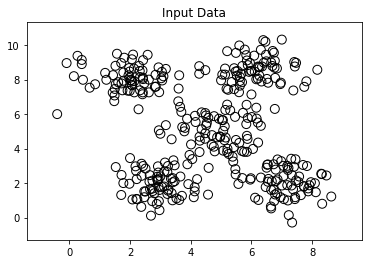

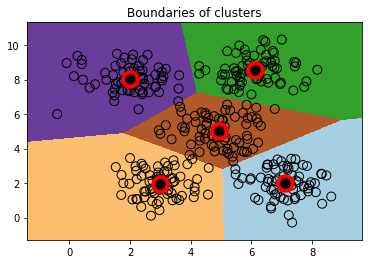

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Load input data
input_file = 'data_clustering.txt'
X = np.loadtxt(input_file, delimiter=',')
print('X: {}'.format(X[:5]))

num_clusters = 5

# Plot input data
plt.figure()
plt.scatter(X[:, 0], 
            X[:, 1], 
            marker='o', 
            facecolors='none', 
            edgecolors='black', 
            s=80)
x_min, x_max = X[:, 0].min() - 1,  X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1,  X[:, 1].max() + 1
plt.title('Input Data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Create KMeans object
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)

# Step size of the mesh
step_size = 0.01

# Define the grid of points to plot the boundaries
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), 
                             np.arange(y_min, y_max, step_size))

# Predict output labels for all the points on the grid
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

output = output.reshape(x_vals.shape)

plt.figure()
plt.clf()
plt.imshow(output, 
           interpolation='nearest',
           extent=(x_vals.min(), 
                   x_vals.max(),
                   y_vals.min(), 
                   y_vals.max()),
           cmap=plt.cm.Paired, 
           aspect='auto', 
           origin='lower')

# Overlay input points
plt.scatter(X[:, 0], X[:, 1], marker='o', facecolors='none', edgecolors='black', s=80)

# Plot the center of clusters
cluster_centers = kmeans.cluster_centers_
print('Cluster Centers: {}'.format(cluster_centers))

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='o', 
            s=210, 
            linewidths=4, 
            color='red', 
            zorder=12, 
            facecolors='black')

plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


